<a href="https://colab.research.google.com/github/kronze1996/Capstone-Project-1/blob/main/Kartikey_Sharma_Team_7_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from collections import Counter 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
working_dir_path = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Data/'

EdStatsData_df = pd.read_csv(working_dir_path + 'Copy of EdStatsData.csv')
CountrySeries_df = pd.read_csv(working_dir_path + 'Copy of EdStatsCountry-Series.csv')
EdStatSeries_df = pd.read_csv(working_dir_path + 'Copy of EdStatsSeries.csv')
EdStatsCountry_df = pd.read_csv(working_dir_path + 'Copy of EdStatsCountry.csv')
EdStatsFootNote_df = pd.read_csv(working_dir_path + 'Copy of EdStatsFootNote.csv')

#0. Dropping unnamed and empty columns :

In [4]:
EdStatsData_df.drop(['Unnamed: 69'],axis=1,inplace=True)
CountrySeries_df.drop(['Unnamed: 3'],axis=1,inplace=True)
EdStatSeries_df.drop(['Unnamed: 20','License Type','Related indicators','Other web links'],axis=1,inplace=True)
EdStatsCountry_df.drop(['Unnamed: 31'],axis=1,inplace=True)
EdStatsFootNote_df.drop(['Unnamed: 4'],axis=1,inplace=True)

#Implementations :

In [5]:
#Comparing Countries based on indicators data:
countryComparision_df=EdStatsData_df[(EdStatsData_df['Indicator Code']=='SE.PRM.TENR') & ((EdStatsData_df['Country Name'] =='India') | (EdStatsData_df['Country Name'] =='Arab World'))].reset_index()
countryComparision_df

,index,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,414149,India,IND,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.136543,84.063087,83.869987,88.703056,NaN,NaN,NaN,96.966560,96.987038,95.643608,96.192810,95.762993,96.984512,97.738869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#fetching columns:
Cols = list(countryComparision_df.columns)

In [7]:
for i in range(len(Cols)):
  if i >3:
    print(Cols[i])

Indicator Code
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2020
2025
2030
2035
2040
2045
2050
2055
2060
2065
2070
2075
2080
2085
2090
2095
2100


In [8]:
# Capturing Indicator names :

indicator_counts= dict(Counter(EdStatsData_df['Indicator Code']))
indicator_names = sorted(set(indicator_counts.keys()))
len(indicator_names)


3665

In [10]:
#Calculating mean for all Data

country1_df=EdStatsData_df[(EdStatsData_df['Country Name'] =='India' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna().to_frame()


# (EdStatsData_df[(EdStatsData_df['Country Name'] =='Zimbabwe' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[countryCols[i] for i in range(len(countryCols)) if i>3 ]].median().dropna()).mean()

In [54]:
country2_df=EdStatsData_df[(EdStatsData_df['Country Name'] =='Zimbabwe' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna().to_frame()
country3_df=EdStatsData_df[(EdStatsData_df['Country Name'] =='Arab' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna().to_frame()
country4_df=EdStatsData_df[(EdStatsData_df['Country Code'] =='BHR' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna().to_frame()
country5_df=EdStatsData_df[(EdStatsData_df['Country Code'] =='BLZ' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna().to_frame()


Text(0.5, 0, 'Series Code')

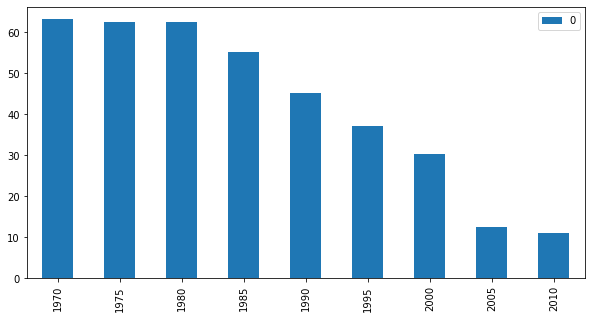

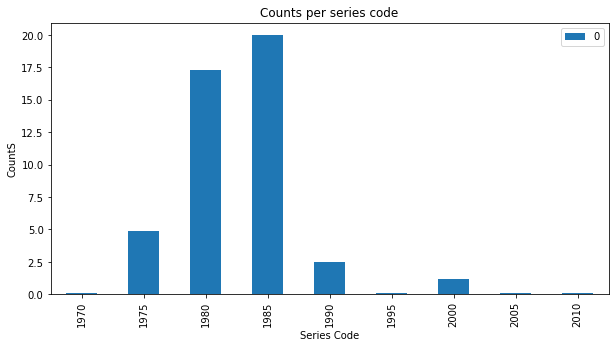

In [57]:
#Meadian Value graph printed for Country India and Zimbabwe

plt.rcParams['figure.figsize'] = (10, 5)
country1_df.plot(kind='bar')
country2_df.plot(kind='bar')

plt.title('Counts per series code')
plt.ylabel('CountS')
plt.xlabel('Series Code')

Text(0.5, 0, 'Series Code')

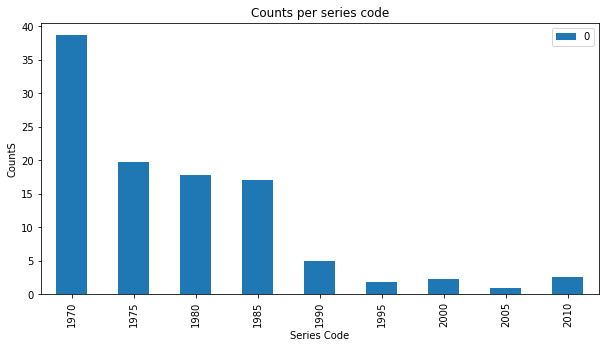

In [56]:
plt.rcParams['figure.figsize'] = (10, 5)
# country3_df.plot(kind='bar')
country4_df.plot(kind='bar')
plt.title('Counts per series code')
plt.ylabel('CountS')
plt.xlabel('Series Code')

# country5_df.plot(kind='bar')


In [35]:
#fetching country codes:
CountryCodes=[]
for i in EdStatsCountry_df['Country Code']:
  CountryCodes.append(i)
CountryCodes

['ABW',
 'AFG',
 'AGO',
 'ALB',
 'AND',
 'ARB',
 'ARE',
 'ARG',
 'ARM',
 'ASM',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHI',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CUW',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'EAP',
 'EAS',
 'ECA',
 'ECS',
 'ECU',
 'EGY',
 'EMU',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'EUU',
 'FIN',
 'FJI',
 'FRA',
 'FRO',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIB',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GRL',
 'GTM',
 'GUM',
 'GUY',
 'HIC',
 'HKG',
 'HND',
 'HPC',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IMN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAC',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LCN',
 'LDC',
 'LIC',


In [49]:
#fetching indicator codes
indicator_counts= dict(Counter(EdStatsData_df['Indicator Name']))
indicator_names = sorted(set(indicator_counts.keys()))
indicator_names


['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [46]:
medians=[]

In [47]:
#Fetching median for all indicators and storing in a new df:
MedianYearEdStats_df=EdStatsData_df[["Indicator Name","Country Name","Country Code","Indicator Code"]]

for j in range(len(indicator_names)):
  for i in range(len(CountryCodes)):
    medians.append((EdStatsData_df[(EdStatsData_df['Country Code'] == CountryCodes[i] )  & (EdStatsData_df['Indicator Code']== indicator_names[j] )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].median().dropna()).mean())


KeyboardInterrupt: ignored

In [50]:
medians

[nan,
 81.24222222222221,
 nan,
 5.7666666666666675,
 nan,
 nan,
 29.11,
 1.2822222222222222,
 3.083333333333334,
 nan,
 nan,
 0.8799999999999999,
 0.8533333333333334,
 nan,
 60.580000000000005,
 2.1877777777777774,
 63.85888888888889,
 nan,
 46.556666666666665,
 2.29,
 11.731111111111112,
 nan,
 nan,
 nan,
 2.396666666666667,
 nan,
 10.30888888888889,
 10.046666666666665,
 1.0111111111111108,
 18.13111111111111,
 nan,
 11.075555555555557,
 67.00888888888889,
 0.29333333333333333,
 16.162222222222223,
 nan,
 1.5166666666666668,
 3.505555555555555,
 52.678888888888885,
 34.84777777777778,
 47.01333333333334,
 12.114444444444445,
 4.69,
 nan,
 nan,
 2.232222222222222,
 1.3544444444444443,
 nan,
 nan,
 5.235555555555555,
 0.4677777777777778,
 24.081111111111113,
 nan,
 nan,
 0.16555555555555557,
 11.231111111111112,
 32.114444444444445,
 nan,
 nan,
 nan,
 nan,
 8.831111111111111,
 37.150000000000006,
 nan,
 nan,
 5.808888888888889,
 1.0899999999999999,
 nan,
 nan,
 0.6,
 2.61,
 0.55888888

In [45]:
MedianYearEdStats_df.loc[(MedianYearEdStats_df['Country Code'] == CountryCodes[i] )  & (MedianYearEdStats_df['Indicator Code']== indicator_names[j] )]["Mean Year"]=medians

,Indicator Name,Country Name,Country Code,Indicator Code
0,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2
1,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2.F
2,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2.GPI
3,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2.M
4,"Adjusted net enrolment rate, primary, both sex...",Arab World,ARB,SE.PRM.TENR
...,...,...,...,...
886925,"Youth illiterate population, 15-24 years, male...",Zimbabwe,ZWE,UIS.LP.AG15T24.M
886926,"Youth literacy rate, population 15-24 years, b...",Zimbabwe,ZWE,SE.ADT.1524.LT.ZS
886927,"Youth literacy rate, population 15-24 years, f...",Zimbabwe,ZWE,SE.ADT.1524.LT.FE.ZS
886928,"Youth literacy rate, population 15-24 years, g...",Zimbabwe,ZWE,SE.ADT.1524.LT.FM.ZS


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#1. EdStats Data :

In [ ]:
EdStatsData_df[(EdStatsData_df["Country Code"]==(i for i in )) and (EdStatsData_df["Indicator Code"]=="UIS.NERA.2") ]['2010'].median()

84.93558883666995

In [ ]:

#fetching columns of country :
countryCols = list(countryComparision_df.columns)


In [59]:
#Country Wise Bar Graph for one indicator

EdStatsData_df[(EdStatsData_df['Country Name'] =='India' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna()

1970    63.10
1975    62.36
1980    62.50
1985    55.22
1990    45.11
1995    37.21
2000    30.22
2005    12.62
2010    11.09
dtype: float64

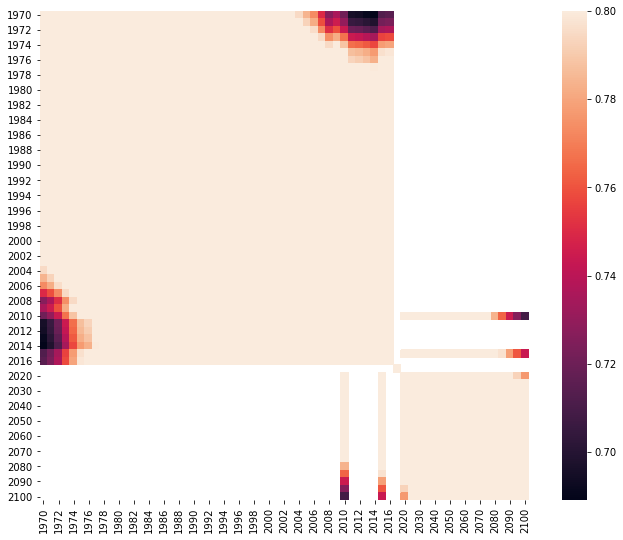

In [ ]:
corrmat=EdStatsData_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [61]:
grouped=EdStatsData_df.groupby(['Indicator Name','Country Name']).first().reset_index()
# YearlyCountryStats_df=grouped.to_frame().reset_index()
# YearlyCountryStats_df.head()
#All indicators for one country :
grouped[grouped['Country Code']=='BLZ']

,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
20,"Adjusted net enrolment rate, lower secondary, ...",Belize,BLZ,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.389870,66.411484,64.100578,NaN,71.032692,NaN,67.360451,65.794769,65.952751,66.899101,66.878937,67.922096,69.027519,72.461113,74.470901,75.752052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Adjusted net enrolment rate, lower secondary, ...",Belize,BLZ,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.837769,70.607338,65.928360,NaN,72.786720,NaN,68.675720,68.959824,68.213951,69.551353,69.535141,70.596222,71.047707,73.598640,76.423759,77.936737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,"Adjusted net enrolment rate, lower secondary, ...",Belize,BLZ,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.151880,1.133550,1.058210,NaN,1.050170,NaN,1.039480,1.100220,1.070470,1.082010,1.082290,1.081690,1.060210,1.031870,1.053780,1.059240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,"Adjusted net enrolment rate, lower secondary, ...",Belize,BLZ,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.025009,62.288719,62.302059,NaN,69.309242,NaN,66.067230,62.678398,63.723240,64.279709,64.248032,65.264580,67.013130,71.325737,72.523712,73.577682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,"Adjusted net enrolment rate, primary, both sex...",Belize,BLZ,SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.197029,96.330887,93.528427,NaN,93.872070,95.470154,95.072166,95.715553,95.296860,96.283333,97.128929,98.016197,97.678619,99.568962,98.887627,99.147568,99.219421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885740,"Youth illiterate population, 15-24 years, male...",Belize,BLZ,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885982,"Youth literacy rate, population 15-24 years, b...",Belize,BLZ,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.311737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886224,"Youth literacy rate, population 15-24 years, f...",Belize,BLZ,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.808929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886466,"Youth literacy rate, population 15-24 years, g...",Belize,BLZ,SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:

# EdStatsData_df[['Country Name','Country Code','Indicator Code','1970'	,'1971'	,'1972'	,'1973',	'1974',	'1975'	,'1976',	'1977',	'1978'	,'1979'	,'1980']].tail(20)
# sample=EdStatsData_df.groupby("Indicator Code")

# Capturing Country names


#2. Country Series Data :

In [ ]:
CountrySeries_df.info()
#Contains repeated data....

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


In [ ]:
CountrySeries_df.groupby("CountryCode").first().reset_index()

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
2,AGO,SP.POP.TOTL,Data sources : United Nations World Population...
3,ALB,SP.POP.GROW,Data sources: United Nations World Population ...
4,AND,SP.POP.TOTL,Data sources : United Nations World Population...
...,...,...,...
206,XKX,SP.POP.TOTL,Data sources : World Bank's Kosovo coutnry off...
207,YEM,SP.POP.GROW,Data sources: United Nations World Population ...
208,ZAF,SP.POP.TOTL,"Data sources : Statistics South Africa, United..."
209,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...


#3. EdStatSeries Data :

In [ ]:
EdStatSeries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [ ]:
EdStatSeries_df[EdStatSeries_df["Series Code"]=='IT.NET.USER.P2']

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,Operators have traditionally been the main sou...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN


#4. EdStatsCountry Data :

In [ ]:
EdStatsCountry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [ ]:
EdStatsCountry_df['External debt Reporting status']

0              NaN
1           Actual
2           Actual
3           Actual
4              NaN
          ...     
236         Actual
237         Actual
238    Preliminary
239         Actual
240         Actual
Name: External debt Reporting status, Length: 241, dtype: object

#5. EdStatsFootNote Data :

In [ ]:
EdStatsFootNote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB


In [ ]:
EdStatsFootNote_df.groupby(["SeriesCode",'CountryCode']).first().reset_index()

,SeriesCode,CountryCode,Year,DESCRIPTION
0,IT.NET.USER.P2,ARE,YR1995,Internet Dial-up customers.
1,IT.NET.USER.P2,ARG,YR2011,Population aged 10+. Estimated based on survey...
2,IT.NET.USER.P2,ARM,YR2013,All population.
3,IT.NET.USER.P2,ATG,YR2011,Population age 5+. Census.
4,IT.NET.USER.P2,AUS,YR2011,Individuals aged 15 years and over
...,...,...,...,...
72981,se.ADT.1524.LT.MA.ZS,IMN,YR1990,Aggregation based on the country data for 1985...
72982,se.ADT.1524.LT.ZS,IMN,YR1980,Aggregation based on the country data for 1975...
72983,se.ADT.LITR.FE.ZS,IMN,YR2008,Aggregation based on the most recent country d...
72984,se.ADT.LITR.MA.ZS,IMN,YR2000,Aggregation based on the country data for 1995...


#Observation for data wrangling:
-Total 195 countries (242 given)
-

#Summary:
1. Fake Columns named (unamed) having zero data (Done) 